# Ejemplo 1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix

# Crear el dataframe con los datos proporcionados
data = {
    'Id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    'Edad': ['Joven', 'Joven', 'Joven', 'Joven', 'Joven', 'Joven', 'Joven', 'Joven', 'pre_presb', 'pre_presb', 'pre_presb', 'pre_presb', 'pre_presb', 'pre_presb', 'pre_presb', 'pre_presb', 'Presbicia', 'Presbicia', 'Presbicia', 'Presbicia', 'Presbicia', 'Presbicia', 'Presbicia', 'Presbicia'],
    'Prescripcion': ['Hipermetropía', 'Miopía', 'Hipermetropía', 'Miopía', 'Hipermetropía', 'Hipermetropía', 'Miopía', 'Miopía', 'Hipermetropía', 'Miopía', 'Miopía', 'Hipermetropía', 'Hipermetropía', 'Hipermetropía', 'Miopía', 'Miopía', 'Miopía', 'Hipermetropía', 'Hipermetropía', 'Hipermetropía', 'Hipermetropía', 'Miopía', 'Miopía', 'Miopía'],
    'Astigmatismo': ['No', 'No', 'Sí', 'Sí', 'No', 'Sí', 'No', 'Sí', 'No', 'Sí', 'No', 'Sí', 'No', 'Sí', 'No', 'Sí', 'Sí', 'No', 'No', 'Sí', 'Sí', 'No', 'No', 'Sí'],
    'Lagrimas': ['Normal', 'Normal', 'Normal', 'Normal', 'Reducida', 'Reducida', 'Reducida', 'Reducida', 'Normal', 'Normal', 'Normal', 'Reducida', 'Reducida', 'Normal', 'Reducida', 'Reducida', 'Normal', 'Normal', 'Reducida', 'Reducida', 'Normal', 'Reducida', 'Normal', 'Reducida'],
    'Diagnostico': ['Lentes_Blandos', 'Lentes_Blandos', 'Lentes_Duros', 'Lentes_Duros', 'No_usar_Lentes', 'No_usar_Lentes', 'No_usar_Lentes', 'No_usar_Lentes', 'Lentes_Blandos', 'Lentes_Duros', 'Lentes_Blandos', 'No_usar_Lentes', 'No_usar_Lentes', 'No_usar_Lentes', 'No_usar_Lentes', 'No_usar_Lentes', 'Lentes_Duros', 'Lentes_Blandos', 'No_usar_Lentes', 'No_usar_Lentes', 'No_usar_Lentes', 'No_usar_Lentes', 'No_usar_Lentes', 'No_usar_Lentes']
}

df = pd.DataFrame(data)

# Convertir atributos categóricos a numéricos
le = LabelEncoder()
df['Edad'] = le.fit_transform(df['Edad'])
df['Prescripcion'] = le.fit_transform(df['Prescripcion'])
df['Astigmatismo'] = le.fit_transform(df['Astigmatismo'])
df['Lagrimas'] = le.fit_transform(df['Lagrimas'])

# Convertir la etiqueta a binaria (Lentes_Blandos vs el resto)
df['Diagnostico'] = df['Diagnostico'].apply(lambda x: 1 if x == 'Lentes_Blandos' else 0)

# Separar características y etiquetas
X = df.drop(['Id', 'Diagnostico'], axis=1)
y = df['Diagnostico']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de Perceptrón
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = perceptron.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precisión: {accuracy}')
print(f'Matriz de confusión:\n{conf_matrix}')

Precisión: 0.625
Matriz de confusión:
[[4 1]
 [2 1]]


Análisis de la Matriz de confusión

       4 1    
       2 1

True Positives (TP): 1

True Negatives (TN): 4

False Positives (FP): 1

False Negatives (FN): 2

El modelo clasificó correctamente 4 instancias de la clase negativa (No usar Lentes o Lentes Duros).
El modelo clasificó correctamente 1 instancia de la clase positiva (Lentes Blandos).
El modelo clasificó incorrectamente 1 instancia como positiva cuando debería ser negativa.
El modelo clasificó incorrectamente 2 instancias como negativas cuando deberían ser positivas.

Dado que la precisión obtenida del modelo Perceptrón es de 0.625 y la matriz de confusión muestra que el modelo no separa perfectamente las clases, esto sugiere que los datos no son linealmente separables para el problema de clasificación planteado. Esto significa que el perceptrón no es capaz de clasificar todos los ejemplos de manera correcta utilizando una separación lineal.


# EJEMPLO 2

In [3]:
#DATO

import pandas as pd

# Definir los datos para cada columna
data = {
    'Diametro': [10, 8, 20, 22],
    'Color': [200, 180, 30, 40],
    'Clase': ['Naranja', 'Naranja', 'Melon', 'Melon']
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)


   Diametro  Color    Clase
0        10    200  Naranja
1         8    180  Naranja
2        20     30    Melon
3        22     40    Melon


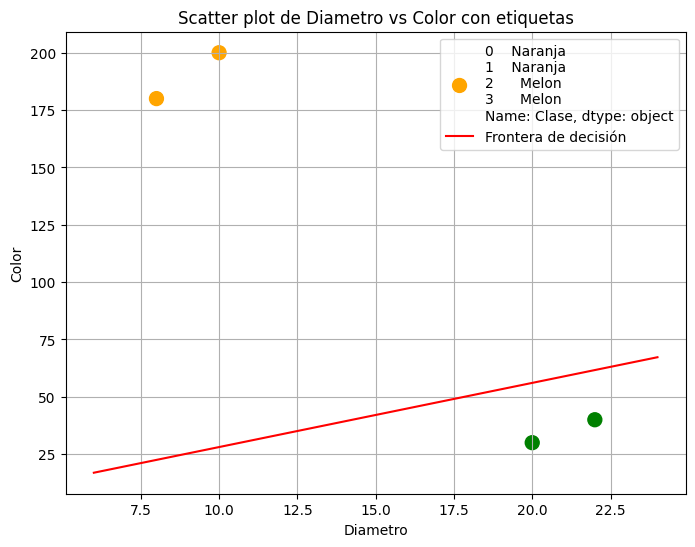

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear el DataFrame con los datos proporcionados
data = {
    'Diametro': [10, 8, 20, 22],
    'Color': [200, 180, 30, 40],
    'Clase': ['Naranja', 'Naranja', 'Melon', 'Melon']
}
df = pd.DataFrame(data)

# Extraer características (features) y etiquetas (labels)
X = df[['Diametro', 'Color']]
y = df['Clase'].map({'Naranja': 0, 'Melon': 1})  # Convertir clases a valores numéricos binarios

# Graficar los puntos
plt.figure(figsize=(8, 6))
colors = np.array(['orange', 'green'])  # Colores para las clases

plt.scatter(df['Diametro'], df['Color'], c=colors[y], s=100, label=df['Clase'])
plt.xlabel('Diametro')
plt.ylabel('Color')
plt.title('Scatter plot de Diametro vs Color con etiquetas')
plt.legend()

# Definir el modelo lineal
intercept = 0.195
w_diametro = 4.607
w_color = -1.647

# Dibujar la frontera de decisión del modelo lineal
x_diametro = np.linspace(df['Diametro'].min() - 2, df['Diametro'].max() + 2, 100)
y_color = (-intercept - w_diametro * x_diametro) / w_color
plt.plot(x_diametro, y_color, '-r', label='Frontera de decisión')

plt.legend()
plt.grid(True)
plt.show()
